#### Problem 1

In [1]:
import itertools, random

import numpy as np
from numpy.linalg import matrix_power as matpow
from numpy.linalg import eig as mateig

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = 11, 8.5

In [2]:
def get_fib(dim):
    '''Returns generalized Fibonacci matrix M and starting vector v'''
    M = [[1]*dim] + [[0]*i+[1]+[0]*(dim-i-1) for i in range(dim-1)]
    v = [1] + [0] * (dim-1)
    return np.array(M), np.array(v)

In [3]:
# Check: matpow(get_fib(3)[0], 5).dot(np.array([1,0,0]))
for dim in [2,3,4,5]:
    eig = mateig(get_fib(dim)[0])[0].max().real
    print('Largest eigevalue (d={}): {}'.format(dim, eig))

Largest eigevalue (d=2): 1.618033988749895
Largest eigevalue (d=3): 1.839286755214161
Largest eigevalue (d=4): 1.927561975482925
Largest eigevalue (d=5): 1.965948236645486


#### Problem 2

Stationary distribution:  [[0.28150134 0.14745308 0.31367292 0.25737265]]
Distribution after 10 steps:   [0.28148165 0.14746332 0.31348351 0.25757151]
Distribution after 100 steps:  [0.28150134 0.14745308 0.31367292 0.25737265]
Step  1: TVD = 0.20483, Over [1e-2, 1e-3, 1e-4]: False, False, False
Step  2: TVD = 0.09113, Over [1e-2, 1e-3, 1e-4]: False, False, False
Step  3: TVD = 0.05083, Over [1e-2, 1e-3, 1e-4]: False, False, False
Step  4: TVD = 0.01813, Over [1e-2, 1e-3, 1e-4]: False, False, False
Step  5: TVD = 0.01065, Over [1e-2, 1e-3, 1e-4]: False, False, False
Step  6: TVD = 0.00377, Over [1e-2, 1e-3, 1e-4]: True, False, False
Step  7: TVD = 0.00226, Over [1e-2, 1e-3, 1e-4]: True, False, False
Step  8: TVD = 0.00088, Over [1e-2, 1e-3, 1e-4]: True, True, False
Step  9: TVD = 0.00049, Over [1e-2, 1e-3, 1e-4]: True, True, False
Step 10: TVD = 0.00021, Over [1e-2, 1e-3, 1e-4]: True, True, False
Step 11: TVD = 0.00011, Over [1e-2, 1e-3, 1e-4]: True, True, False
Step 12: TVD = 0.00005,

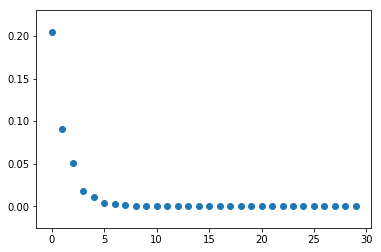

Is TVD decreasing?
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]


In [5]:
M = np.array([[0.3, 0.0, 0.5, 0.2],
              [0.0, 0.4, 0.3, 0.3],
              [0.3, 0.2, 0.0, 0.5],
              [0.4, 0.1, 0.5, 0.0]])

def dist_after_steps(M, v, t):
    '''Returns distribution after t steps of M, starting from v'''
    return v @ matpow(M, t)

def stationary(M):
    '''Returns the stationary distribution of a matrix'''
    evals, evecs = mateig(M.T)
    principal_evec = evecs.T[np.abs(evals - 1.0) < 1e-5]
    return principal_evec / principal_evec.sum()

# Print stationary distribution
pi = stationary(M)
print('Stationary distribution: ', pi)

# Print distributions starting from a
print('Distribution after 10 steps:  ', dist_after_steps(M, np.array([1.,0.,0.,0.]), 10))
print('Distribution after 100 steps: ', dist_after_steps(M, np.array([1.,0.,0.,0.]), 100))

# This is O(n^2), but n is small enought that this does not matter
tvds = []
steps = 30
for t in range(1, steps+1):
    d_current = dist_after_steps(M, np.array([1.,0.,0.,0.]), t) 
    tvd = 0.5 * np.sum(np.abs(d_current - pi))                          
    tvds.append(tvd) # for plotting
    print('Step {:2d}: TVD = {:.5f}, Over [1e-2, 1e-3, 1e-4]: {}, {}, {}'.format(
          t, tvd, tvd.item() < 1e-2, tvd.item() < 1e-3, tvd.item() < 1e-4))
plt.scatter(np.arange(steps), tvds)
plt.show()

print('Is TVD decreasing?')
print(np.array(tvds)[:-1] - np.array(tvds)[1:] > 0)

#### Problem 3

In [77]:
# Set up transition matrix, surfer probability
M = np.array([[0, 0, 1, 1, 1, 0,],
              [0, 0, 1, 0, 1, 0,],
              [0, 0, 0, 1, 1, 0,],
              [0, 1, 1, 0, 0, 0,],
              [0, 0, 0, 0, 0, 1,],
              [1, 0, 0, 0, 0, 0,],]).astype(np.float64)
M_pagerank = M / M.sum(axis=1).reshape(-1,1)
E = np.ones(M.shape) / 6

In [95]:
# Pagerank # = stationary(0.85 * M + 0.15 * E)
v = np.ones(6) / 6
for t in range(1000):
    v = 0.85 * np.matmul(v, M_pagerank) + 0.15 * np.ones(6) / 6
# v = stationary(0.85 * M_pagerank + 0.15 * E)
print('Pagerank:  ', v) #', '.join(['{:.5f}'.format(a) for a in v]))

# HITS
x = np.ones(6)  # authorities
y = np.ones(6)  # hubs
for t in range(1000):
    x = np.matmul(y, M)
    y = np.matmul(x, M.T)
    x = x / np.sqrt((x*x).sum())
    y = y / np.sqrt((y*y).sum())
print('HITS Auth: ', ', '.join(['{:.5f}'.format(a) for a in x]))
print('HITS Hubs: ', ', '.join(['{:.5f}'.format(a) for a in y]))

Pagerank:   [0.18655078 0.09107877 0.1826433  0.15547946 0.19418794 0.19005975]
HITS Auth:  0.00000, 0.11393, 0.59080, 0.45489, 0.65655, 0.00000
HITS Hubs:  0.68444, 0.50154, 0.44689, 0.28336, 0.00000, 0.00000


#### Problem 4
This problem is a proof.

#### Problem 5

In [193]:
# Footrule and Kendall distances
s1 = 'qwertyuiopasdfghjklzxcvbnm'
s2 = 'etaonihsrdlumwcfgypbvkqxjz'

footrule = sum(abs(s1.index(x) - s2.index(x)) for x in s1)
kendall = sum((s1.index(x) < s1.index(y)) != (s2.index(x) < s2.index(y)) for x,y in itertools.combinations(s1, 2))

print('Footrule: ', footrule)
print('Kendall:  ', kendall)

Footrule:  180
Kendall:   125


In [265]:
symbols = 'ABCDEF'
symbols = {symbols[i]: i for i in range(len(symbols))}
partial_ranking = ['ABCD','DFEC','BEFA','BCDE','CFAB','AEFD']

def mc3(partial_ranking, symbols):
    '''Compute the MC3 matrix from Dwork et al., page 619'''
    matrix = np.zeros((6,6))
    for s in symbols:
        rs = [r for r in partial_ranking if s in r]
        for r in rs:
            matrix_update = 1 / len(rs) / len(r)
            for i in range(0, r.index(s)): # rank better
                matrix[symbols[s], symbols[r[i]]] += matrix_update
            for i in range(r.index(s), len(r)):
                matrix[symbols[s], symbols[s]] += matrix_update
    return matrix

def mc4(partial_ranking, symbols):
    '''Compute the MC4 matrix from Dwork et al., page 619'''
    matrix = np.zeros((6,6))
    matrix_update = 1 / len(symbols)
    for s1 in symbols: 
        for s2 in symbols:
            s1_higher = sum(r.index(s1) < r.index(s2) for r in partial_ranking if s1 in r and s2 in r)
            s2_higher = sum(r.index(s2) < r.index(s1) for r in partial_ranking if s1 in r and s2 in r)
            if s2_higher > s1_higher:
                matrix[symbols[s1], symbols[s2]] += matrix_update
            else:
                matrix[symbols[s1], symbols[s1]] += matrix_update
    return matrix

In [313]:
print('MC3: ', stationary(mc3(partial_ranking, symbols)))
print('MC4: ', stationary(mc4(partial_ranking, symbols)))

MC3:  [[0.22273158+0.j 0.26709875+0.j 0.15275582+0.j 0.06929076+0.j
  0.11344715+0.j 0.17467594+0.j]]
MC4:  [[0.27272727-0.j 0.22727273-0.j 0.04545455-0.j 0.04545455-0.j
  0.13636364-0.j 0.27272727-0.j]]


#### Problem 6
This problem is a proof.

#### Problem 7

In [53]:
def g_graph(vertices, edges):
    '''Constructs G_{n,m} graph with n vertices, m edges'''
    matrix = np.zeros((vertices, vertices)).astype(bool)
    while(edges > 0):
        x = random.randint(0, vertices-1)
        y = random.randint(0, vertices-1)
        if not matrix[x,y] and x != y:
            matrix[x,y] = matrix[y,x] = True
            edges -= 1
    return matrix.astype(int)

def z_graph(vertices, edges):
    '''Constructs Z_{n,m} graph with n vertices, m edges. Idea
       is to factor p(x,y) = p(x) p(y|x) and draw sequentially.'''
    matrix = np.zeros((vertices, vertices)).astype(bool)
    degrees = np.ones(vertices)
    choice = np.arange(vertices)
    while(edges > 0):
        x = np.random.choice(choice, p=degrees/degrees.sum())
        y = np.random.choice(choice, p=degrees/degrees.sum())
        if not matrix[x,y] and x != y:
            degrees[x] += 1
            degrees[y] += 1
            matrix[x,y] = matrix[y,x] = True
            edges -= 1
    return matrix.astype(int)

def num_trianges(adj_matrix):
    '''The number of trianges is the trace of M^3 divided
       by 6, where M is the adjacency matrix of the graph.'''
    return np.sum(matpow(adj_matrix, 3) * np.eye(adj_matrix.shape[0])) / 6

In [55]:
# Compute average number of trianges with a (100,250) graph
samples = 100
total_trianges_g = 0
total_trianges_z = 0
for i in range(samples):
    G = g_graph(100,250)
    Z = z_graph(100,250)
    total_trianges_g += num_trianges(G)
    total_trianges_z += num_trianges(Z)
avg_trianges_g = total_trianges_g / samples
avg_trianges_z = total_trianges_z / samples

print('Total trianges with (100,250) g_graph: ', avg_trianges_g)
print('Total trianges with (100,250) z_graph: ', avg_trianges_z)

# Compute average number of trianges with a (1000, 5000) graph
samples = 100
total_trianges_g = 0
total_trianges_z = 0
for i in range(samples):
    G = g_graph(1000,5000)
    Z = z_graph(1000,5000)
    total_trianges_g += num_trianges(G)
    total_trianges_z += num_trianges(Z)
    if i % 10 == 0: print(f'{i} | ', end='')
avg_trianges_g = total_trianges_g / samples
avg_trianges_z = total_trianges_z / samples

print('')
print('Total trianges with (1000,5000) g_graph: ', avg_trianges_g)
print('Total trianges with (1000,5000) z_graph: ', avg_trianges_z)

Total trianges with (100,250) g_graph:  20.77
Total trianges with (100,250) z_graph:  100.46
1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 31 | 32 | 33 | 34 | 35 | 36 | 37 | 38 | 39 | 41 | 42 | 43 | 44 | 45 | 46 | 47 | 48 | 49 | 51 | 52 | 53 | 54 | 55 | 56 | 57 | 58 | 59 | 61 | 62 | 63 | 64 | 65 | 66 | 67 | 68 | 69 | 71 | 72 | 73 | 74 | 75 | 76 | 77 | 78 | 79 | 81 | 82 | 83 | 84 | 85 | 86 | 87 | 88 | 89 | 91 | 92 | 93 | 94 | 95 | 96 | 97 | 98 | 99 | 
Total trianges with (1000,5000) g_graph:  166.79
Total trianges with (1000,5000) z_graph:  1161.79
